# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $\sum{X_2^2}$
    - $\sum{X_2 \cdot y}$
    - $\sum{X_1 \cdot X_2}$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2}
$$

- Что вы можете сказать? Что произошло с коэффициентом?

Выразим через X1 всё что было предложено выразить

- $ \sum{X_2^2} = \mu^2 \sum{X_1^2}$
- $ \sum{X_2 \cdot y} = \mu \sum{X_1 \cdot y }$
- $ \sum{X_1 \cdot X_2}  = \mu \sum{X_1^2}$


И подставим в формулу

$\beta_2 = \dfrac{\sum{X_1 \cdot y} \cdot \mu^2 \sum{X_1^2} - \mu \sum{X_1 \cdot y } \cdot \mu \sum{X_1^2}}{\sum{X_1^2} \cdot \mu^2 \sum{X_1^2} - (\mu \sum{X_1^2})^2}
$

$\beta_2 = \dfrac{\sum{X_1 \cdot y} \cdot \mu^2 \sum{X_1^2} - \sum{X_1 \cdot y } \cdot \mu^2 \sum{X_1^2}}{(\mu \sum{X_1^2})^2 - (\mu \sum{X_1^2})^2} = \dfrac{0}{0}
$

Как известно, делить на ноль нельзя)) 

Получается, что решений для коэффициентов в R с такими регрессорами не будет. Такая модель фундаментально неправильная и в ней присутствует полная коллинеарность. Для того, чтобы такая ситуация не наблюдалась, необходимо исключить из модели $X_1$ или $X_2$

### №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $\hat{\gamma} $  
    - $ \hat{\gamma} - \gamma $  
    - $\hat{\beta} $
    - $\hat{\beta} - \beta$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

Посчитаем

- $ \hat\gamma_{OLS} = \dfrac{cov(x_t,x_{t−1})}{var(x_{t−1})} = \dfrac{\frac{1}{N} \sum{(\theta + x_{t-1} \cdot \gamma + u_t) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}}  = \gamma + \dfrac{\frac{1}{N} \sum{(\theta + u_t) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}}  \implies $

- $ \hat{\gamma} - \gamma = \dfrac{\frac{1}{N} \sum{(\theta + u_t) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}} $


- $ \hat\beta_{OLS} = \dfrac{cov(r_t,x_{t−1})}{var(x_{t−1})} = \dfrac{\frac{1}{N} \sum{(\alpha + x_{t-1} \cdot \beta + \phi \cdot u_t + w_t ) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}}  = \beta + \dfrac{\frac{1}{N} \sum{(\alpha + \phi \cdot u_t + w_t ) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}}  \implies $


- $ \hat{\beta} - \beta = \dfrac{\frac{1}{N} \sum{(\alpha + \phi \cdot u_t + w_t ) x_{t-1}}}{\frac{1}{N} \sum{x_{t-1}^2}} $



Оценки получаются смещенными...

## №3 (60 баллов)

- Давайте вернемся к уже известному датасету с машинами

In [79]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_white

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [11]:
df = pd.read_csv('HW_002_001.csv')

In [12]:
df.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


- Вы уже пытались построить всякие разные модификации линейной регресии
- Давайте же попробуем сделать опять все то же самое (можете взять ту модель, которую успели сделать на занятии)

- Расскажите немного, почему вы выбрали именно эти переменные
- Какие зависимости вы ожидали увидеть? Можете подкрепить свои гипотезы графиками
- Как зависимости в итоге увидели? Как вы считаете почему?

Я возьму модельку, которая была в семинарском ноутбучке. Итак

- price: возьмем логарифм цены, так как ее распределение хорошо подходит под такую зависимость


- mpg: довольно очевидно, что на цену машины будет влиять ее пробег; возьмем величину, равную $ \dfrac{1}{mpg} $, так как распределение mpg на графике подходит под такую зависимость
    - базово price отрицательно зависит от mpg - чем больше у машины пробег, тем меньше она стоит
    - мы использовали $ \dfrac{1}{mpg} $ и от этой величины цена наоборот будет зависеть положительно
- headroom: габаритная высота - можно предположить, что чем больше и выше машина, тем дороже она будет и чтобы не включать коррелирующие переменные длина-ширина-высота, остановимся на этой
- weight: вес - аналогично можно предположить, что чем тяжелее машина, тем она больше, в ней больше какой-либо полезной начинки (как можно догадаться, я ничего не знаю о машинах), и поэтому она дороже. Также могу сказать, что эта переменная имеет довольно сильную положительную корреляцию с price, что подтверждает мою нестройную гипотезу 
- turn: радиус разворота машины - я так понимаю, что эта характеристика отражает маневренность автомобиля. И если он большой, то эта самая маневренность больше, поэтому можно предположить положительную зависимость с price. Даже если я неправильно это поняла, довольно существенная положительная коррелеция с ценой мою гипотезу как бы подтверждает
- gear_ratio: передаточное число - если я правильно понимаю, то при уменьшении передаточного числа увеличивается максимальная скорость автомобиля, однако падает его разгонная динамика, поэтому я включу и квадрат передаточного числа: от самого передаточного числа предполагаю несильную отрицательную зависимость, а от квадрата положительную 
- Domestic: переработанная колонка foreign - Дамми переменная, которая равна 1, если машина произведена в той же стране и 0, если произведена в другой. Из-за таможенных пошлин и других логистических издержек, предполагается, что если эта машина Domestic, то при прочих равных условиях она будет дешевле 

In [62]:
df_for_model = pd.DataFrame()

df_for_model['price'] = np.log(df['price'])
df_for_model['mpg'] = 1/df['mpg']
df_for_model['headroom'] = df['headroom']
df_for_model['weight'] = df['weight']
df_for_model['turn'] = df['turn']
df_for_model['gear_ratio'] = df['gear_ratio']
df_for_model['gear_ratio_sqr'] = df['gear_ratio'] **2
df_for_model = pd.concat([df_for_model, pd.get_dummies(df['foreign'])['Domestic']], axis = 1)

model_cars = smf.ols('price ~ mpg+headroom+weight+turn+gear_ratio+gear_ratio_sqr+Domestic ', data = df_for_model)

Привожу расчет корреляции с ценой, корреляционную матрицу вообще и все графики, о которых я говорила

In [63]:
df_for_model.corr().price.to_frame().sort_values(by=["price"], ascending=True)

,price
gear_ratio,-0.283770
gear_ratio_sqr,-0.250078
Domestic,-0.087027
headroom,0.109804
turn,0.308442
weight,0.540456
mpg,0.592563
price,1.000000


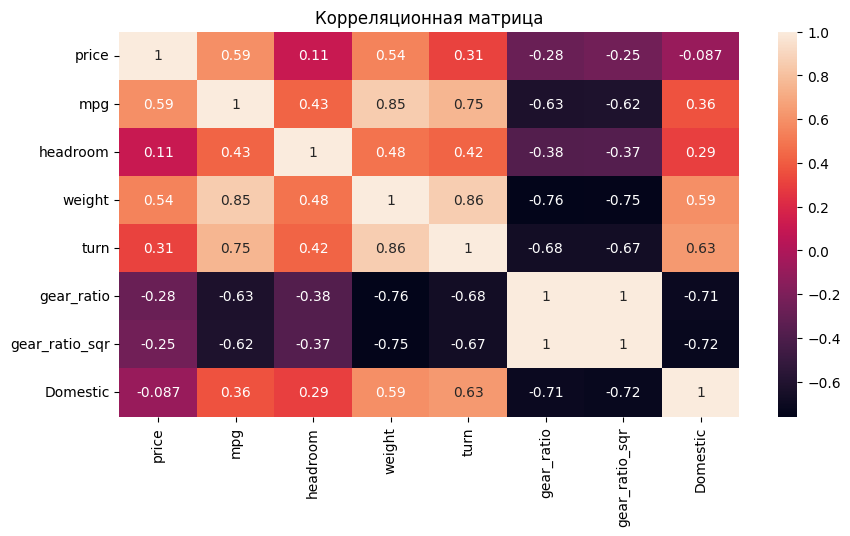

In [64]:
plt.figure(figsize=(10, 5))
corr = df_for_model.corr()
sns.heatmap(corr, annot=True)
plt.title("Корреляционная матрица")
plt.show()

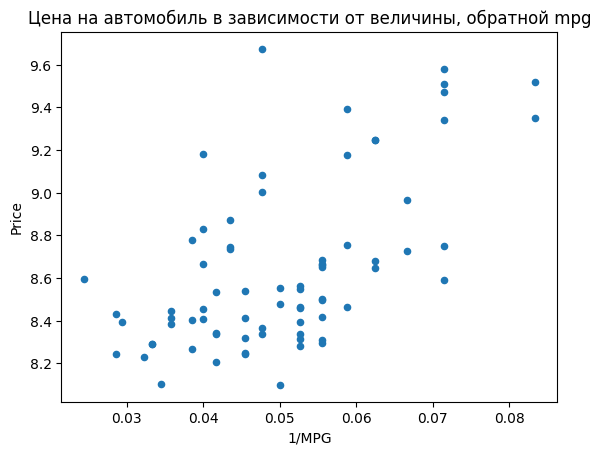

In [65]:
df_for_model.plot.scatter(x = 'mpg', y = 'price')
plt.ylabel("Price")
plt.xlabel("1/MPG")
plt.title("Цена на автомобиль в зависимости от величины, обратной mpg")
plt.show()

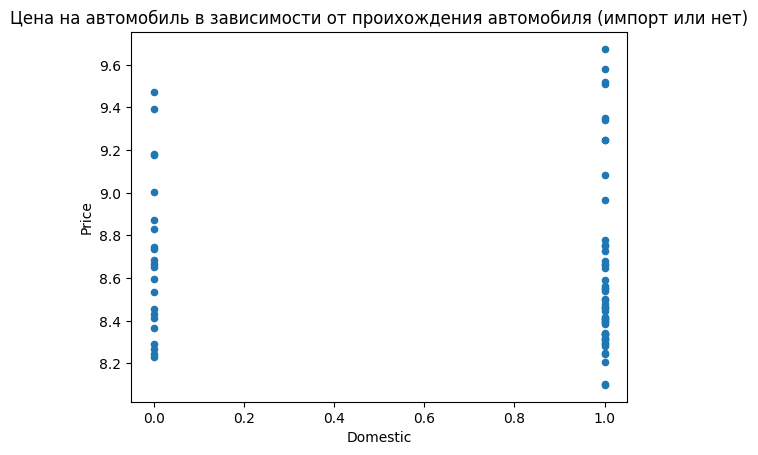

In [66]:
df_for_model.plot.scatter(x = 'Domestic', y = 'price')
plt.ylabel("Price")
plt.xlabel("Domestic")
plt.title("Цена на автомобиль в зависимости от проихождения автомобиля (импорт или нет)")
plt.show()

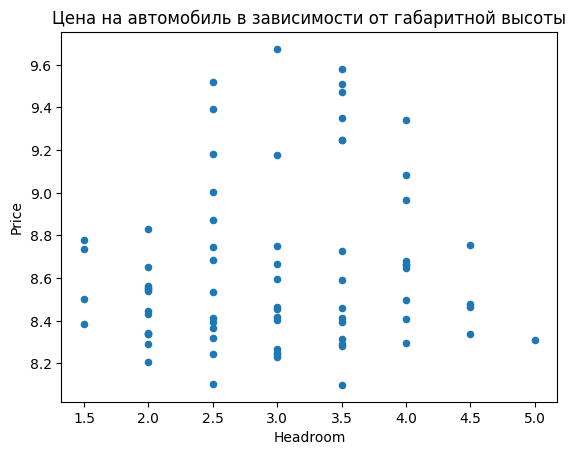

In [67]:
df_for_model.plot.scatter(x = 'headroom', y = 'price')
plt.ylabel("Price")
plt.xlabel("Headroom")
plt.title("Цена на автомобиль в зависимости от габаритной высоты")
plt.show()

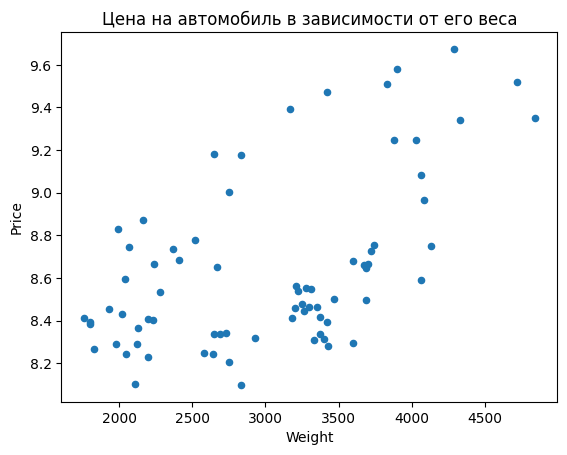

In [68]:
df_for_model.plot.scatter(x = 'weight', y = 'price')
plt.ylabel("Price")
plt.xlabel("Weight")
plt.title("Цена на автомобиль в зависимости от его веса")
plt.show()

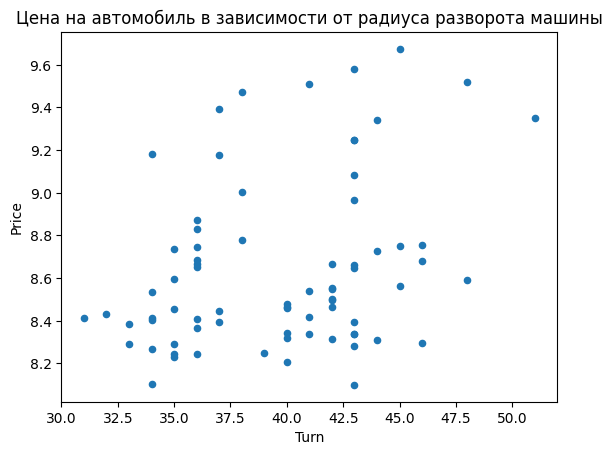

In [69]:
df_for_model.plot.scatter(x = 'turn', y = 'price')
plt.ylabel("Price")
plt.xlabel("Turn")
plt.title("Цена на автомобиль в зависимости от радиуса разворота машины")
plt.show()

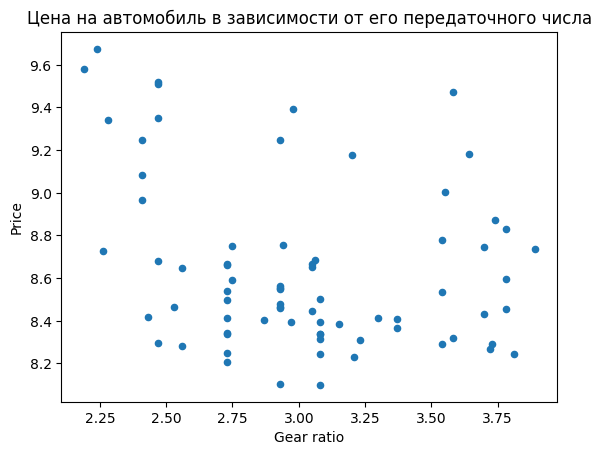

In [70]:
df_for_model.plot.scatter(x = 'gear_ratio', y = 'price')
plt.ylabel("Price")
plt.xlabel("Gear ratio")
plt.title("Цена на автомобиль в зависимости от его передаточного числа")
plt.show()

Обучим эту прекрасную модель

In [71]:
model_cars = model_cars.fit()
print(model_cars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     18.58
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.97e-13
Time:                        22:42:33   Log-Likelihood:                 5.0723
No. Observations:                  74   AIC:                             5.855
Df Residuals:                      66   BIC:                             24.29
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.7631      1.429      8.

Оценки всех переменных значимы на 10% уровне значимости. Все высказанные гипотезы о связи между переменной и ценой подтвердились, в целом регрессия значима, $R^2$ довольно большой.

- Теперь же давайте посмотрим на данную модель немного скептически
- Вы прошли предпосылки теоремы Г.М. и знаете о том, как тестировать на наличие нарушений этих предпосылок, как исправлять их, если возможно, и какие последствия они могут нести
- Собственно, давайте их и проверим

- Перед тем как бездумно проверять на все подряд, предположите, какие именно предпосылки могут быть нарушение
- Обоснуйте свои предпосылки. Почему вы так считаете? 
- Какие еще графики можно построить, чтобы сделать диагностику модели?
- Можно ли как-то "починить" модель, если было обнаружено нарушение предпосылки теоремы Г.М.? 
- Все ли нарушения предпосылок вы проверили? 

Опишу свои предположения:

1) Довольно очевидно, что у нас присутсвует мультиколлинеарность - это было очевидно еще при построении корреляционной матрицы, но и так понятно, что gear_ratio и gear_ratio_sqr полность скоррелированы; а также что габаритная высота скоррелирована с весом машины - как правило, если машина большая, то она и будет тяжелее; также, как я понимаю, есть неочевидная для меня фундаментальная функциональная связь между передаточным числом, весом автомобиля и его маневренностью - то есть радиусом разворота. 

2) Также довольно очевидно, что у нас есть пропущенные переменные (наша модель, хотя и значима в целом, понятное дело далеко не идеально описывает реальность) - это повод подумать о проверке не гетероскедастичность. Ни большие, ни маленькие выбросы я тоже не выкидывала - это значит, что обычно работающая log-трансформация price не обязательно избавила меня от гетероскедастичности

3) Про эндогенность аналогично - на первый взгляд ничего непонятно, но вполне вероятно, что какие-то объясняющие переменные я пропустила, а какие-то бесполезные наоборот добавила


Теперь обосную свои предположения:
1) Однозначно обосновать наличие мультиколлинеарности можно, посмотрев на conditional number нашей регрессии - он огромный, мультиколлинеарность на месте)

2) Гетероскедастичность - без того, чтобы взглянуть на распределение ошибок, я определить наличие гетероскедастичности не могу. Поэтому построю график распределения ошибок и проведу тест Уайта

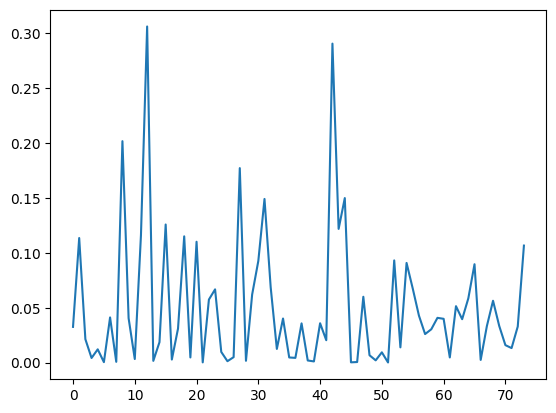

In [74]:
plt.plot(model_cars.resid**2)
plt.show()

Если честно, я тут ничего однозначного не вижу

In [80]:
white_test = het_white(model_cars.resid,  model_cars.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 50.22359662014496, 'LM-Test p-value': 0.027854089708304844, 'F-Statistic': 2.560399310178092, 'F-Test p-value': 0.00247985273764055}


Я вижу, что тк p-value < 0.05, то гетероскедастичность есть на 5 процентном уровне значимости.

После того, как мы видим нарушения, нужно сказать, каким образом от них избавиться (и почему я этого не сделала))):
1) По поводу мультиколлинеарности - самый простой способ, это, конечно, исключить переменные, которые ее вызывают. Однако в нашу модель не попадало никаких случайных переменных, за каждой из них стоит определенная бизнес-логика, если можно так сказать. Гипотезы о зависимости между ценой и этими переменными подтвердились.
2) По поводу гетероскедастичности - мы брали логарифм цены, поэтому в общем какая-то попытка избавиться от гетероскедастичности была.. Можно вместо OLS использовать какой-нибудь другой способ получения оценок (возможно weighted OLS)

- Улучшилась ли ваша моделька?
- Как вы считаете, всегда надо "добивать" нарушения предпосылок теорему Г.М.? 
- Что бы вы предпочли, логичную с точки зрения здравого смысла и бизнес сенса модель, но с какими-то нарушениями теоремы Г.М. или же модель, в которой нет нарушений, но при этом совершенно непонятно, почему те или иные переменные в ней оказались? А возможен ли вообще второй случай по вашему мнению?

Если честно, зависит от целей, которые стоят передо мной. Если нам нужна модель для предсказания каких-то конкретных величин, то я бы использовала чисто мо-шный подход и брала ту модель, которая лучше предсказывает (то есть ту, которая реже ошибается на тесте, имеет меньшую метрику ошибки - и для меня соблюдение условий ГМ было бы глубоко вторично, как и те непонятные переменные, которые такую предсказательную силу модели обеспечили)
Если же наша исследовательская цель не ограничивается минимизацией ошибки на тесте, я бы конечно предпочла осмысленную модель, желательно вообще подкрепленную не только бизнес-сенсом, но и какими-то уже имеющимися исследованиями и моделями... 
Получается вроде как, что прицельно модель без нарушений предпосылок ГМ я не выберу. Однако, зная, какие специфичные модели побеждают в некоторых соревнованиях на каггле, вполне вероятно, что второй случай возможен.